### __케라스__  
Sequential 클래스로 모델 생성 (순차적으로 레이어를 쌓아가는 방식을 모델링)  
1) 데이터셋 생성  
- 훈련 / 검증 / 시험 셋 구분  
- 데이터 형식 변환  
***
2) 모델 (ANN ,DNN) 구성  
- Sequential 클래스 활용 레이어 추가  
- 복잡한 모델의 경우 함수API 사용  
***
3) 학습과정 설정  
- cost함수 정의 , optimizer함수 정의  
- compile 함수  
***
4) 모델 학습  
- 훈련 데이터 -> 학습  
- fit 함수로 학습 시작  
***
5) 모델 검증  
- 훈련셋 , 검증셋에 대한 cost, acc 비교 그래프  
- epoch 설정  
***
6) 모델 평가  
- 테스트 데이터로 평가  
- evaluate 메소드 활용  
***
7) 모델 사용  
- 임의 입력 데이터 -> 모델 -> 예측된 출력값  
- predict 메소드 활용  
***

# MNIST

In [1]:
# 패키지 로드
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Activation

In [23]:
# step1
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [24]:
xtrain = xtrain.reshape(60000,28*28).astype('float32')/255.0

In [25]:
xtest = xtest.reshape(10000,28*28).astype('float32')/255.0

In [26]:
xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [17]:
# step2

model = Sequential()
model.add(Dense(units=64 , input_dim=28*28 , activation='relu'))
model.add(Dense(units=10 , activation='softmax'))

In [19]:
# step3

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [28]:
# step4

hist = model.fit(xtrain,ytrain,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 894us/step - loss: 0.6736 - accuracy: 0.8235
Epoch 2/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.3461 - accuracy: 0.9037
Epoch 3/5
1875/1875 [==============================] - 2s 927us/step - loss: 0.2977 - accuracy: 0.9162
Epoch 4/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.2675 - accuracy: 0.9252
Epoch 5/5
1875/1875 [==============================] - 2s 904us/step - loss: 0.2441 - accuracy: 0.9319


In [34]:
# step6 

res = model.evaluate(xtest,ytest,batch_size=32)
print(res)

313/313 [==============================] - 0s 610us/step - loss: 0.2265 - accuracy: 0.9352
[0.2264719009399414, 0.9351999759674072]


In [37]:
# step7

yhat = model.predict(xtest[0:1])
print('예측 결과 :',yhat)

예측 결과 : [[4.7283385e-05 9.5088166e-07 3.0476163e-04 2.6550556e-03 2.9052919e-06
  5.6262386e-05 3.6778307e-08 9.9614221e-01 5.5164390e-05 7.3533092e-04]]


In [38]:
import numpy as np
np.sum(yhat)

1.0

In [39]:
yhat.argmax()

7

# 선형 회귀

In [40]:
x = np.array([1,2,3,4,5,6,7,8,9]) # 공부시간
y = np.array([11,20,31,47,52,69,74,89,100]) # 공부시간

In [57]:
model = Sequential()
model.add(Dense(units=1,input_dim=1,activation='linear'))

In [58]:
from keras import optimizers

my_opt = optimizers.SGD(lr=0.001)
model.compile(loss='mse',optimizer=my_opt,metrics=['mse'])

In [59]:
model.fit(x,y,batch_size=1,epochs=500)

Epoch 1/500
9/9 [==============================] - 0s 667us/step - loss: 2213.7810 - mse: 2213.7810
Epoch 2/500
9/9 [==============================] - 0s 889us/step - loss: 647.8540 - mse: 647.8540
Epoch 3/500
9/9 [==============================] - 0s 777us/step - loss: 192.0279 - mse: 192.0279
Epoch 4/500
9/9 [==============================] - 0s 889us/step - loss: 59.5528 - mse: 59.5528
Epoch 5/500
9/9 [==============================] - 0s 667us/step - loss: 21.6954 - mse: 21.6954
Epoch 6/500
9/9 [==============================] - 0s 667us/step - loss: 11.0373 - mse: 11.0373
Epoch 7/500
9/9 [==============================] - 0s 667us/step - loss: 7.6899 - mse: 7.6899
Epoch 8/500
9/9 [==============================] - 0s 666us/step - loss: 6.9135 - mse: 6.9135
Epoch 9/500
9/9 [==============================] - 0s 999us/step - loss: 6.7307 - mse: 6.7307
Epoch 10/500
9/9 [==============================] - 0s 778us/step - loss: 6.6403 - mse: 6.6403
Epoch 11/500
9/9 [=====================

9/9 [==============================] - 0s 667us/step - loss: 5.9855 - mse: 5.9855
Epoch 88/500
9/9 [==============================] - 0s 555us/step - loss: 5.9683 - mse: 5.9683
Epoch 89/500
9/9 [==============================] - 0s 778us/step - loss: 5.9718 - mse: 5.9718
Epoch 90/500
9/9 [==============================] - 0s 555us/step - loss: 5.9742 - mse: 5.9742
Epoch 91/500
9/9 [==============================] - 0s 778us/step - loss: 5.9686 - mse: 5.9686
Epoch 92/500
9/9 [==============================] - 0s 1ms/step - loss: 5.9685 - mse: 5.9685
Epoch 93/500
9/9 [==============================] - 0s 667us/step - loss: 5.9164 - mse: 5.9164
Epoch 94/500
9/9 [==============================] - 0s 778us/step - loss: 5.9536 - mse: 5.9536
Epoch 95/500
9/9 [==============================] - 0s 556us/step - loss: 5.9273 - mse: 5.9273
Epoch 96/500
9/9 [==============================] - 0s 666us/step - loss: 5.8892 - mse: 5.8892
Epoch 97/500
9/9 [==============================] - 0s 555us/step

9/9 [==============================] - 0s 555us/step - loss: 5.5869 - mse: 5.5869
Epoch 173/500
9/9 [==============================] - 0s 667us/step - loss: 5.5992 - mse: 5.5992
Epoch 174/500
9/9 [==============================] - 0s 1ms/step - loss: 5.5848 - mse: 5.5848
Epoch 175/500
9/9 [==============================] - 0s 555us/step - loss: 5.5389 - mse: 5.5389
Epoch 176/500
9/9 [==============================] - 0s 666us/step - loss: 5.5739 - mse: 5.5739
Epoch 177/500
9/9 [==============================] - 0s 555us/step - loss: 5.5594 - mse: 5.5594
Epoch 178/500
9/9 [==============================] - 0s 667us/step - loss: 5.5688 - mse: 5.5688
Epoch 179/500
9/9 [==============================] - 0s 556us/step - loss: 5.5663 - mse: 5.5663
Epoch 180/500
9/9 [==============================] - 0s 666us/step - loss: 5.5725 - mse: 5.5725
Epoch 181/500
9/9 [==============================] - 0s 1ms/step - loss: 5.5680 - mse: 5.5680
Epoch 182/500
9/9 [==============================] - 0s 44

9/9 [==============================] - 0s 1ms/step - loss: 5.3888 - mse: 5.3888
Epoch 257/500
9/9 [==============================] - 0s 555us/step - loss: 5.3973 - mse: 5.3973
Epoch 258/500
9/9 [==============================] - 0s 666us/step - loss: 5.3399 - mse: 5.3399
Epoch 259/500
9/9 [==============================] - 0s 556us/step - loss: 5.3278 - mse: 5.3278
Epoch 260/500
9/9 [==============================] - 0s 555us/step - loss: 5.3518 - mse: 5.3518
Epoch 261/500
9/9 [==============================] - 0s 1ms/step - loss: 5.3740 - mse: 5.3740
Epoch 262/500
9/9 [==============================] - 0s 889us/step - loss: 5.3297 - mse: 5.3297
Epoch 263/500
9/9 [==============================] - 0s 667us/step - loss: 5.3771 - mse: 5.3771
Epoch 264/500
9/9 [==============================] - 0s 779us/step - loss: 5.3817 - mse: 5.3817
Epoch 265/500
9/9 [==============================] - 0s 666us/step - loss: 5.2839 - mse: 5.2839
Epoch 266/500
9/9 [==============================] - 0s 66

9/9 [==============================] - 0s 889us/step - loss: 5.2697 - mse: 5.2697
Epoch 342/500
9/9 [==============================] - 0s 1ms/step - loss: 5.2705 - mse: 5.2705
Epoch 343/500
9/9 [==============================] - 0s 999us/step - loss: 5.2721 - mse: 5.2721
Epoch 344/500
9/9 [==============================] - 0s 778us/step - loss: 5.2263 - mse: 5.2263
Epoch 345/500
9/9 [==============================] - 0s 556us/step - loss: 5.2325 - mse: 5.2325
Epoch 346/500
9/9 [==============================] - 0s 666us/step - loss: 5.2640 - mse: 5.2640
Epoch 347/500
9/9 [==============================] - 0s 1ms/step - loss: 5.2482 - mse: 5.2482
Epoch 348/500
9/9 [==============================] - 0s 444us/step - loss: 5.2185 - mse: 5.2185
Epoch 349/500
9/9 [==============================] - 0s 1ms/step - loss: 5.2690 - mse: 5.2690
Epoch 350/500
9/9 [==============================] - 0s 667us/step - loss: 5.2408 - mse: 5.2408
Epoch 351/500
9/9 [==============================] - 0s 667u

9/9 [==============================] - 0s 778us/step - loss: 5.2180 - mse: 5.2180
Epoch 427/500
9/9 [==============================] - 0s 556us/step - loss: 5.1360 - mse: 5.1360
Epoch 428/500
9/9 [==============================] - 0s 667us/step - loss: 5.2294 - mse: 5.2294
Epoch 429/500
9/9 [==============================] - 0s 778us/step - loss: 5.1608 - mse: 5.1608
Epoch 430/500
9/9 [==============================] - 0s 555us/step - loss: 5.1820 - mse: 5.1820
Epoch 431/500
9/9 [==============================] - 0s 667us/step - loss: 5.2070 - mse: 5.2070
Epoch 432/500
9/9 [==============================] - 0s 555us/step - loss: 5.2051 - mse: 5.2051
Epoch 433/500
9/9 [==============================] - 0s 556us/step - loss: 5.2035 - mse: 5.2035
Epoch 434/500
9/9 [==============================] - 0s 555us/step - loss: 5.1390 - mse: 5.1390
Epoch 435/500
9/9 [==============================] - 0s 778us/step - loss: 5.2045 - mse: 5.2045
Epoch 436/500
9/9 [==============================] - 0

In [62]:
xtest = np.array([9.5 , 7.2])
model.predict(xtest)

array([[104.860916],
       [ 79.29757 ]], dtype=float32)

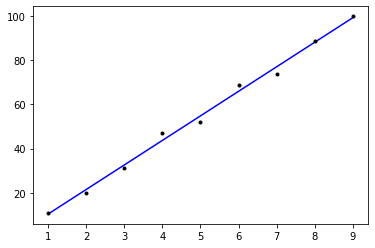

In [63]:
import matplotlib.pyplot as plt

plt.plot(x, model.predict(x), 'b' , x, y, 'k.')

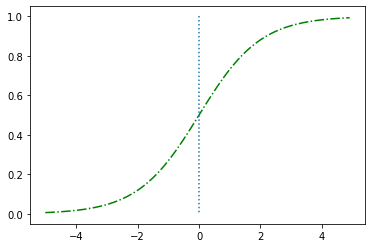

In [68]:
def mySigmoid(value):
    
    ret_value = 1 / (1+np.exp(-value))
    return ret_value

x = np.arange(-5,5,0.1)
y = mySigmoid(x)

plt.plot(x,y,'g-.')
plt.plot([0,0],[1,0],":")

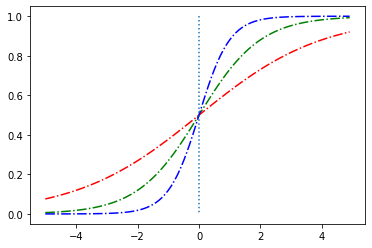

In [69]:
def mySigmoid(z):
    
    ret_value = 1 / (1+np.exp(-z))
    return ret_value

x = np.arange(-5,5,0.1)
y1 = mySigmoid(1*x)
y2 = mySigmoid(0.5*x)
y3 = mySigmoid(2*x)

plt.plot(x,y1,'g-.')
plt.plot(x,y2,'r-.')
plt.plot(x,y3,'b-.')
plt.plot([0,0],[1,0],":")

### 이진 분류기

In [75]:
x = np.array([-50,-40,-30,-20,-10,-5,0,5,10,22,31,47,55])
y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1])  # 0: 불 , 1:합

In [76]:
model = Sequential()
model.add(Dense(input_dim=1,units=1,activation='sigmoid'))
my_opt = optimizers.SGD(lr=0.01)
model.compile(loss='binary_crossentropy',optimizer=my_opt,metrics=['binary_accuracy'])
model.fit(x,y,batch_size=1,epochs=5)

Epoch 1/5
13/13 [==============================] - 0s 770us/step - loss: 0.0534 - binary_accuracy: 1.0000
Epoch 2/5
13/13 [==============================] - 0s 615us/step - loss: 0.0532 - binary_accuracy: 1.0000
Epoch 3/5
13/13 [==============================] - 0s 615us/step - loss: 0.0530 - binary_accuracy: 1.0000
Epoch 4/5
13/13 [==============================] - 0s 615us/step - loss: 0.0528 - binary_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 0s 769us/step - loss: 0.0526 - binary_accuracy: 1.0000


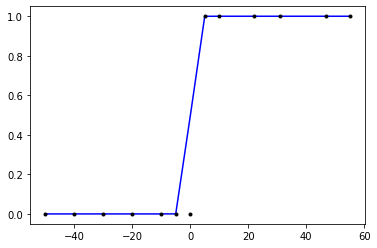

In [77]:
plt.plot(x,model.predict(x),'b',x,y,'k.')